In [1]:
from FultonMarketAnalysis import FultonMarketAnalysis
import numpy as np

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.

****** PyMBAR will use 64-bit JAX! *******
* JAX is currently set to 32-bit bitsize *
* which is its default.                  *
*                                        *
* PyMBAR requires 64-bit mode and WILL   *
* enable JAX's 64-bit mode when called.  *
*                                        *
* This MAY cause problems with other     *
* Uses of JAX in the same code.          *
******************************************



In [2]:
test_dir = '/expanse/lustre/projects/iit119/dcooper/MOR/replica_exchange/7u2k_4'
analysis = FultonMarketAnalysis(test_dir, skip=10)

10/08/2024 10:16:09 // Found storage directory at /expanse/lustre/projects/iit119/dcooper/MOR/replica_exchange/7u2k_4/saved_variables
10/08/2024 10:16:09 // Shapes of temperature arrays: [(0, (100,)), (1, (100,)), (2, (100,)), (3, (100,)), (4, (100,)), (5, (100,)), (6, (101,)), (7, (101,)), (8, (101,)), (9, (101,)), (10, (101,)), (11, (101,)), (12, (101,)), (13, (101,)), (14, (101,)), (15, (101,)), (16, (101,)), (17, (101,)), (18, (101,)), (19, (101,))]
10/08/2024 10:16:29 // Detected interpolations at: [[1], [1], [1], [1], [1], [1], [], [], [], [], [], [], [], [], [], [], [], [], [], []]



******* JAX 64-bit mode is now on! *******
*     JAX is now set to 64-bit mode!     *
*   This MAY cause problems with other   *
*      uses of JAX in the same code.     *
******************************************



10/08/2024 10:16:31 // Shape of final energies determined to be: (9844, 101, 101)


10/08/2024 10:16:38 // Equilibration detected at 877.6 ns


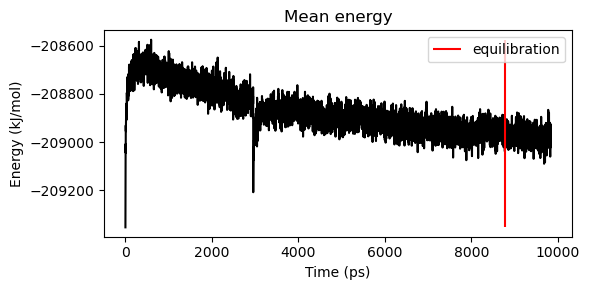

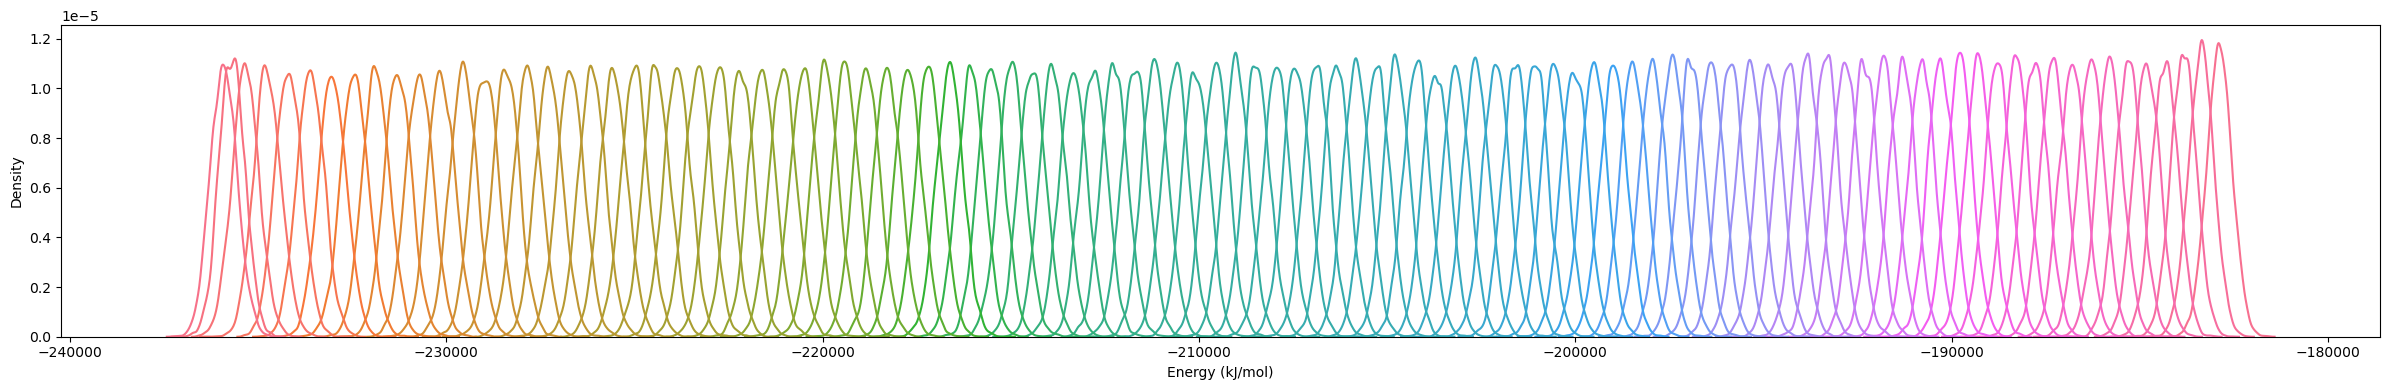

In [3]:
_, fig, ax = analysis.get_average_energy(plot=True, figsize=(6,3))
fig, ax = analysis.plot_energy_distributions(figsize=(24,4))

In [4]:
analysis.importance_resampling(use_uncorrelated_inds=False)
analysis.weights.shape

10/08/2024 10:16:49 // Equilibration detected at 877.6 ns


(107868, 101)

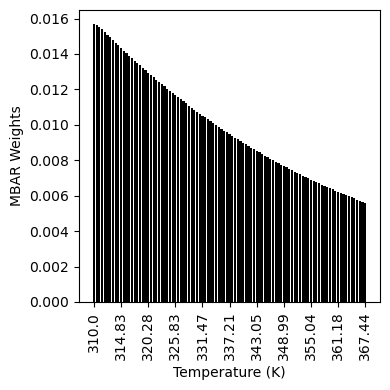

In [5]:
fig, ax = analysis.plot_weights()

In [7]:
traj = analysis.write_resampled_traj('/expanse/lustre/projects/iit119/dcooper/MOR/equil/output/7u2k.pdb', 'test.pdb', 'test.dcd', return_traj=True)

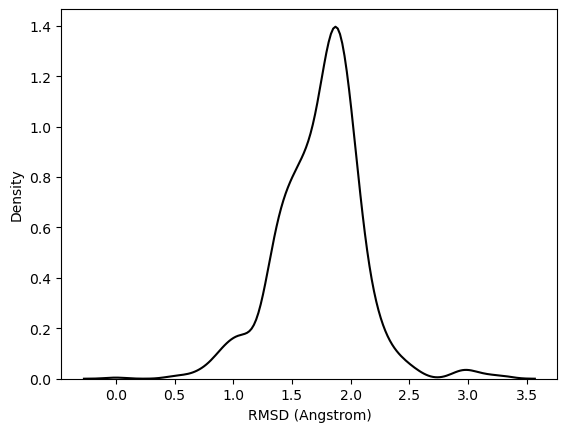

In [19]:
import mdtraj as md
import matplotlib.pyplot as plt
import seaborn as sns

lig_sele = traj.topology.select('resname UNK')
RMSD = md.rmsd(traj, traj, atom_indices=lig_sele)*10
sns.kdeplot(RMSD, c='k')
plt.xlabel('RMSD (Angstrom)')
plt.show()